<a href="https://colab.research.google.com/github/lgiesen/forest-height/blob/main/RandomForest_Labeled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/DataDa2/images_train.zip

Archive:  gdrive/My Drive/DataDa2/images_train.zip
  inflating: images/image_000.npy    
  inflating: images/image_001.npy    
  inflating: images/image_002.npy    
  inflating: images/image_003.npy    
  inflating: images/image_004.npy    
  inflating: images/image_005.npy    
  inflating: images/image_006.npy    
  inflating: images/image_007.npy    
  inflating: images/image_008.npy    
  inflating: images/image_009.npy    
  inflating: images/image_010.npy    
  inflating: images/image_011.npy    
  inflating: images/image_012.npy    
  inflating: images/image_013.npy    
  inflating: images/image_014.npy    
  inflating: images/image_015.npy    
  inflating: images/image_016.npy    
  inflating: images/image_017.npy    
  inflating: images/image_018.npy    
  inflating: images/image_019.npy    


In [ ]:
!unzip gdrive/My\ Drive/DataDa2/masks_train.zip

Archive:  gdrive/My Drive/DataDa2/masks_train.zip
  inflating: masks/mask_000.npy      
  inflating: masks/mask_001.npy      
  inflating: masks/mask_002.npy      
  inflating: masks/mask_003.npy      
  inflating: masks/mask_004.npy      
  inflating: masks/mask_005.npy      
  inflating: masks/mask_006.npy      
  inflating: masks/mask_007.npy      
  inflating: masks/mask_008.npy      
  inflating: masks/mask_009.npy      
  inflating: masks/mask_010.npy      
  inflating: masks/mask_011.npy      
  inflating: masks/mask_012.npy      
  inflating: masks/mask_013.npy      
  inflating: masks/mask_014.npy      
  inflating: masks/mask_015.npy      
  inflating: masks/mask_016.npy      
  inflating: masks/mask_017.npy      
  inflating: masks/mask_018.npy      
  inflating: masks/mask_019.npy      


In [ ]:
import numpy as np
import pandas as pd
#np.set_printoptions(threshold=sys.maxsize)

#print(os.listdir(os.getcwd()))
data = np.empty((0,11))
print(data)
print(data.shape)



for i in range(10):
  X = np.load('/content/images/image_00'+ str(i) + '.npy')
  y = np.load('/content/masks/mask_00'+ str(i) + '.npy')
  X = X.reshape(10, -1)
  y = y.reshape(1, -1)
  Xy = np.concatenate((X, y), axis=0)
  Xy = Xy.transpose()
  # Concatenate the arrays along the first axis (number of features)
  data = np.concatenate((data, Xy), axis=0)
  print(data.shape)




[]
(0, 11)
(1048576, 11)
(2097152, 11)
(3145728, 11)
(4194304, 11)
(5242880, 11)
(6291456, 11)
(7340032, 11)
(8388608, 11)
(9437184, 11)
(10485760, 11)


In [ ]:
for i in range(10,20):
    X = np.load('/content/images/image_0' + str(i) + '.npy')
    y = np.load('/content/masks/mask_0' + str(i) + '.npy')
    X1 = X[[0, 1, 2, 6, 7, 8, 9]]
    X1 = X1.reshape(7, -1).transpose()
    y = y.reshape(1, -1).transpose()

    # Calculate NDVI
    b8 = X[[6]].reshape(1, -1).transpose()
    b4 = X[[2]].reshape(1, -1).transpose()
    denominator = b8 + b4
    ndvi = np.where(denominator != 0, (b8 - b4) / denominator, 0)

    # Concatenate the slices with the new column

    Xy = np.concatenate((X1, y), axis=1)
    index = Xy.shape[1] - 1

    left_slice = Xy[:, :index]
    right_slice = Xy[:, index:]
    Xy = np.concatenate((left_slice, ndvi, right_slice), axis=1)
    #Xy_ndvi = np.hstack((Xy, ndvi))

    # Concatenate the arrays along the first axis (number of features)
    data = np.concatenate((data, Xy), axis=0)
    print(data.shape)

In [ ]:

num = np.count_nonzero(data[:,10])
indices = np.nonzero(data[:,-1])

labeled_data = data[indices]
print(labeled_data.shape)

df = pd.DataFrame(labeled_data)
print(df)



(17253, 11)
          0       1       2       3       4       5       6       7       8   \
0      217.0   407.0   233.0   603.0  1574.0  1885.0  2150.0  2036.0  1013.0   
1      233.0   317.0   238.0   519.0  1297.0  1575.0  1581.0  1684.0   732.0   
2      157.0   287.0   215.0   513.0  1300.0  1545.0  1381.0  1720.0   839.0   
3      220.0   351.0   268.0   611.0  1505.0  1792.0  1844.0  2028.0   935.0   
4      254.0   408.0   314.0   844.0  2078.0  2472.0  2202.0  2689.0  1263.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
17248  272.0   389.0   288.0   706.0  1903.0  2317.0  2596.0  2644.0  1302.0   
17249  286.0   417.0   295.0   681.0  2057.0  2595.0  2530.0  2766.0  1350.0   
17250  817.0  1050.0  1400.0  1644.0  2046.0  2250.0  2388.0  2602.0  3300.0   
17251  650.0   901.0   946.0  1394.0  2617.0  2989.0  3220.0  3261.0  3059.0   
17252  472.0   730.0   748.0  1323.0  2656.0  3199.0  3212.0  3468.0  2462.0   

           9          10  


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
#X_train, y_train, X_test, y_test = train_test_split(X1,y1, test_size=0.2, random_state=1)

# Step 3: Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    labeled_data[:, :-1],  # Features
    labeled_data[:, -1],   # Labels
    test_size=0.3,          # Adjust the test size as needed
    random_state=42         # Set a random seed for reproducibility
)

print(np.min(y_test), np.max(y_test))


1.899999976158142 69.97000122070312


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

preds = model.predict(X_test)

RMSE: 7.134656674089574


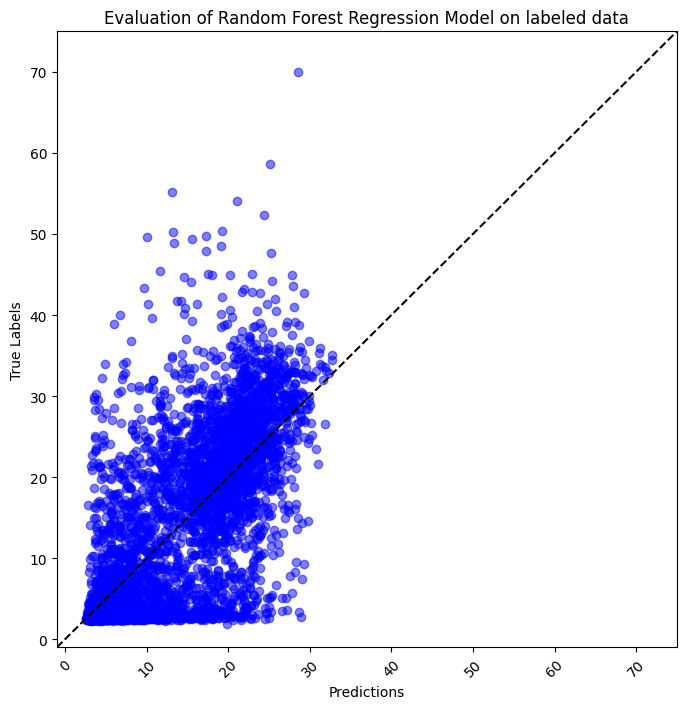

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, preds))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(preds, y_test, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-1,75], [-1, 75], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-1,75])
plt.ylim([-1,75])
plt.title("Evaluation of Random Forest Regression Model on labeled data")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 50.9033258571309


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtm = DecisionTreeRegressor(random_state=0)
param_grid = {"max_depth": range(1,6)}
# FIXME: MSE is used? check!
grid_model = GridSearchCV(dtm, param_grid, cv=5, refit=True,scoring="neg_mean_squared_error")
grid_model.fit(X_train, y_train)
print("Best hyperparameters::\n{}".format(grid_model.best_params_))

Best hyperparameters::
{'max_depth': 4}


In [ ]:
from sklearn.metrics import mean_squared_error

# get predictions on test set
preds = grid_model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE of model on test set: {}".format(mse))

MSE of model on test set: 54.20928942167293


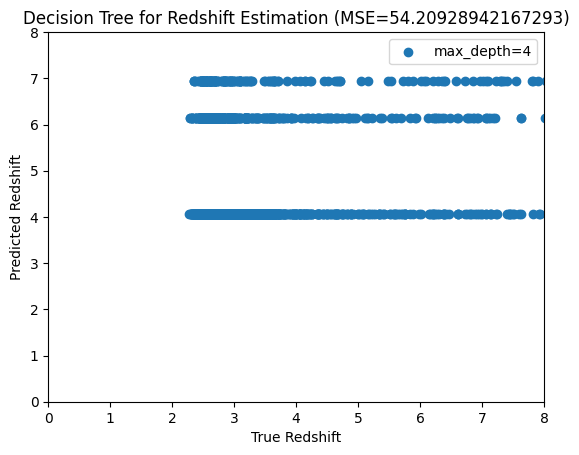

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds, label="max_depth={}".format(grid_model.best_params_['max_depth']))
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.title("Decision Tree for Redshift Estimation (MSE={})".format(mse))
plt.xlim([0,8])
plt.ylim([0,8])
plt.legend()
plt.show()